### Descriptive Statistic for Main Dataset
Showing the total number of immigrants living in the node countries with world's total population in that year 
and the percentage 


In [109]:
import pandas as pd

# Load the 'edges.csv' dataset
edges_data = pd.read_csv('edges.csv')  

# Load the 'World-pop.csv' dataset
world_population_data = pd.read_csv('World_pop.csv')  
# Creating a dictionary to store migration data
migration_data = {
    'Year': [],
    'Total Immigrants': [],
    'Male Immigrants': [],
    'Female Immigrants': [],
    'Growth Rate (%)': [],  # Adding a column for percentage increase from the previous year
    'World Population': [],  # Adding a column for world population
    'Percentage of Immigrants': []  # Adding a column for the percentage of immigrants compared to world population
}

# Extracting total, male, and female migration for each year from 'edges_data'
migration_columns = ['1990', '1995', '2000', '2005', '2010', '2015']  # List of years

# Calculate migration statistics for each year
for i, year in enumerate(migration_columns):
    total_migration = edges_data[f'migration_{year}_total'].sum()
    male_migration = edges_data[f'migration_{year}_male'].sum()
    female_migration = edges_data[f'migration_{year}_female'].sum()
    
    # Calculate percentage increase from the previous year
    if i == 0:
        migration_data['Growth Rate (%)'].append(0)  # Set 0 for the first year (1990)
    else:
        increase_percentage = ((total_migration - migration_data['Total Immigrants'][i - 1]) / migration_data['Total Immigrants'][i - 1]) * 100
        migration_data['Growth Rate (%)'].append(increase_percentage)
    
    # Add migration data to the dictionary
    migration_data['Year'].append(year)
    migration_data['Total Immigrants'].append(total_migration)
    migration_data['Male Immigrants'].append(male_migration)
    migration_data['Female Immigrants'].append(female_migration)
    
    # Extract world population for the respective year
    world_population = world_population_data.loc[world_population_data['Year'] == int(year), 'World-Pop-mean'].values[0]
    migration_data['World Population'].append(world_population)
    
    # Calculate the percentage of immigrants compared to world population
    percentage_immigrants = (total_migration / world_population) * 100
    migration_data['Percentage of Immigrants'].append(percentage_immigrants)

# Creating a DataFrame from the migration data
migration_df = pd.DataFrame(migration_data)

# Displaying the migration data in a formatted table
print(migration_df.to_string(index=False))


Year  Total Immigrants  Male Immigrants  Female Immigrants  Growth Rate (%)  World Population  Percentage of Immigrants
1990         144183352         73335686           70847666         0.000000        5316175862                  2.712163
1995         152646765         77448982           75197783         5.869896        5743219454                  2.657861
2000         164748597         83691793           81056804         7.927998        6148898975                  2.679319
2005         182416026         93088355           89327671        10.723872        6558176119                  2.781505
2010         211672392        109117506          102554886        16.038265        6985603105                  3.030123
2015         233916692        120716062          113200630        10.508834        7426597537                  3.149715


### Descriptive Statistic for edited target dataset (Total number of immigrants moved to the node country) with growth rate

In [110]:
import pandas as pd

# Load the 'edges_flows.csv' dataset
edges_flows = pd.read_csv('edges_flows.csv')  

# Creating a dictionary to store migration data
migration_data = {
    'Year': [],
    'Total Immigrants': [],
    'Male Immigrants': [],
    'Female Immigrants': [],
    'Growth Rate (%)': []  # Adding a column for percentage increase from the previous year
}

# Extracting total, male, and female migration for each year from 'edges_flows'
migration_columns = ['1995', '2000', '2005', '2010', '2015']  # List of years

# Calculate migration statistics for each year
for i, year in enumerate(migration_columns):
    total_migration = edges_flows[f'migration_{year}_total'].sum()
    male_migration = edges_flows[f'migration_{year}_male'].sum()
    female_migration = edges_flows[f'migration_{year}_female'].sum()
    
    migration_data['Year'].append(year)
    migration_data['Total Immigrants'].append(total_migration)
    migration_data['Male Immigrants'].append(male_migration)
    migration_data['Female Immigrants'].append(female_migration)
    
    # Calculate percentage increase from the previous year
    if i == 0:
        migration_data['Growth Rate (%)'].append(0)  # Set 0 for the first year (1990)
    else:
        increase_percentage = ((total_migration - migration_data['Total Immigrants'][i - 1]) / migration_data['Total Immigrants'][i - 1]) * 100
        migration_data['Growth Rate (%)'].append(increase_percentage)

# Creating a DataFrame from the migration data
migration_df = pd.DataFrame(migration_data)

# Displaying the migration data in a formatted table
print(migration_df.to_string(index=False))


Year  Total Immigrants  Male Immigrants  Female Immigrants  Growth Rate (%)
1995          35077029         17487548           17589481         0.000000
2000          30979220         15498523           15480697       -11.682315
2005          35935663         18672822           17262841        15.999250
2010          41454650         22475337           18979313        15.357966
2015          30802134         16563032           14239102       -25.696794


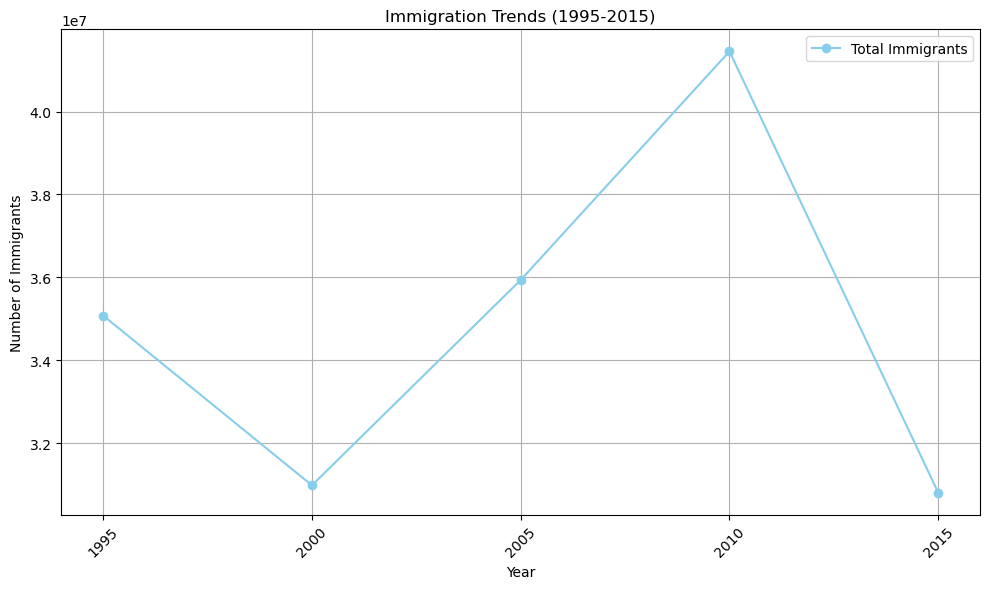

In [112]:
# Plotting the migration data using a line graph
plt.figure(figsize=(10, 6))

plt.plot(migration_df['Year'], migration_df['Total Immigrants'], marker='o', label='Total Immigrants', color='skyblue')
#plt.plot(migration_df['Year'], migration_df['Male Immigrants'], marker='o', label='Male Immigrants', color='blue')
#plt.plot(migration_df['Year'], migration_df['Female Immigrants'], marker='o', label='Female Immigrants', color='pink')

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Immigration Trends (1995-2015)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Queston 4
Degree Centrality 

### Step 1: Creating Wieghted Directed graphs


In [125]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import numpy as np
import pandas as pd

# Load the CSV file into a DataFrame
nodes_df = pd.read_csv('nodes.csv')
# Load the edges.csv file into a DataFrame
edges_df = pd.read_csv('edges_flows.csv')

def create_graph(nodes_df, edges_df, migration_year):
    graph = nx.DiGraph()

    # Add nodes
    for index, row in nodes_df.iterrows():
        graph.add_node(row['Label'], name=row['Abb'])

    # Add edges with weights and attributes for the specific year
    for index, row in edges_df.iterrows():
        source = row['source']
        target = row['target']
        weight = row[migration_year]
        if weight != 0:
            female_ratio = row[migration_year.replace('total', 'female')] / weight
        else:
            female_ratio = 0
        graph.add_edge(source, target, weight=weight, female_ratio=female_ratio)

    # Clean up the graph (removing low weight edges and isolated nodes)
    mean_weight = np.mean([d['weight'] for _, _, d in graph.edges(data=True)])
    print(f'Mean weight: {mean_weight}')
    remove_low_weight_edges(graph, mean_weight*4)
    remove_isolated_nodes(graph)
    return graph

def visualize_graph(graph, nodes_df, title):
    node_sizes = [graph.degree(n, weight='weight')/5000 for n in graph.nodes()]
    edge_weights = [d['weight'] / 100000 for _, _, d in graph.edges(data=True)]

    # Position, size, and labels
    node_positions = {row['Label']: (row['lng'], row['lat']) for index, row in nodes_df.iterrows() if row['Label'] in graph.nodes}
    labels = get_high_degree_labels(graph, nodes_df)

    # Edge colors based on female ratio
    female_ratios = np.array([d['female_ratio'] for _, _, d in graph.edges(data=True)])
    norm = mcolors.Normalize(vmin=female_ratios.min(), vmax=female_ratios.max())
    cmap = plt.get_cmap('magma')
    edge_colors = [cmap(norm(d['female_ratio'])) for _, _, d in graph.edges(data=True)]

    # Visualization
    plt.figure(figsize=(15, 10))
    nx.draw_networkx_nodes(graph, node_positions, node_size=node_sizes, node_color='red', alpha=0.7)
    nx.draw_networkx_edges(graph, node_positions, width=edge_weights, alpha=0.5, edge_color=edge_colors)
    nx.draw_networkx_labels(graph, node_positions, labels=labels, font_size=12)
    plt.title(title)
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), orientation='vertical', label='Female Ratio')
    plt.show()

def remove_low_weight_edges(graph, threshold):
    edges_to_remove = [(u, v) for u, v, d in graph.edges(data=True) if d['weight'] < threshold]
    graph.remove_edges_from(edges_to_remove)

def remove_isolated_nodes(graph):
    nodes_to_remove = [n for n in graph.nodes() if graph.degree(n) == 0]
    graph.remove_nodes_from(nodes_to_remove)

def get_high_degree_labels(graph, nodes_df):
    return {n: data['Abb'] for n, data in nodes_df.set_index('Label').iterrows() 
            if n in graph.nodes() and (graph.degree(n, weight='weight') > 500000 )}

# Main execution loop for each migration year
migration_years = [ 'migration_1995_total', 'migration_2000_total', 'migration_2005_total', 'migration_2010_total', 'migration_2015_total']
graphs =[]
for year in migration_years:
    # Create a separate graph for each year and store it in a dictionary
    graph = create_graph(nodes_df, edges_df, year)
    # Visualize the graph
    # visualize_graph(graph, nodes_df, year)
    graphs.append(graph)


Mean weight: 3124.0674207338798
Mean weight: 2759.10402565016
Mean weight: 3200.539989312433
Mean weight: 3692.077841111507
Mean weight: 2743.3322052012827


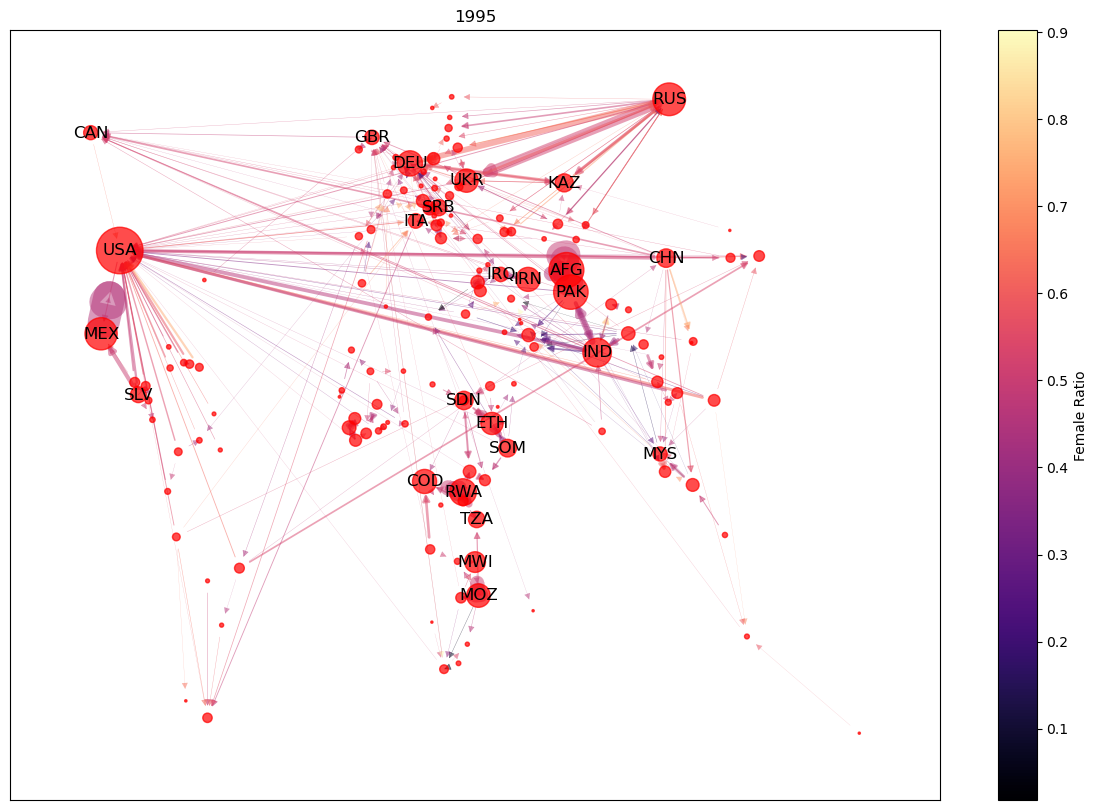

In [126]:
visualize_graph(graphs[0], nodes_df, '1995')

In [127]:
# Removing the weights from the first graph
for u, v, d in graphs[0].edges(data=True):
        d.clear()

### 2- In-degree and out-degree Centrality for directed- unweighted graph 1 (1995)


In [128]:
# Choose the index of 'migration_1995_total' in the migration_years list
year_index = migration_years.index('migration_1995_total')

# Measure in-degree centrality for the graph at index 'year_index'
in_degree_centrality_1995 = nx.in_degree_centrality(graphs[year_index])

# Measure out-degree centrality for the graph at index 'year_index'
out_degree_centrality_1995 = nx.out_degree_centrality(graphs[year_index])

# Print in-degree centrality for 1995
print("In-Degree Centrality for 1995:")
for node, in_degree in in_degree_centrality_1995.items():
    print(f"Node {node}: {in_degree}")
print("--------------------")

# Print out-degree centrality for 1995
print("Out-Degree Centrality for 1995:")
for node, out_degree in out_degree_centrality_1995.items():
    print(f"Node {node}: {out_degree}")
print("--------------------")


In-Degree Centrality for 1995:
Node 0: 0.0
Node 1: 0.0
Node 2: 0.0
Node 5: 0.0
Node 8: 0.03424657534246575
Node 9: 0.02054794520547945
Node 11: 0.02054794520547945
Node 12: 0.0136986301369863
Node 13: 0.00684931506849315
Node 15: 0.00684931506849315
Node 16: 0.0136986301369863
Node 18: 0.0136986301369863
Node 19: 0.02054794520547945
Node 21: 0.00684931506849315
Node 22: 0.0
Node 23: 0.0
Node 24: 0.0
Node 26: 0.0
Node 28: 0.00684931506849315
Node 31: 0.0
Node 32: 0.00684931506849315
Node 33: 0.00684931506849315
Node 35: 0.0136986301369863
Node 37: 0.08904109589041095
Node 40: 0.0
Node 42: 0.00684931506849315
Node 43: 0.00684931506849315
Node 44: 0.00684931506849315
Node 45: 0.00684931506849315
Node 46: 0.0
Node 48: 0.00684931506849315
Node 50: 0.0136986301369863
Node 51: 0.02054794520547945
Node 52: 0.00684931506849315
Node 53: 0.0
Node 56: 0.00684931506849315
Node 57: 0.0
Node 58: 0.0273972602739726
Node 60: 0.00684931506849315
Node 62: 0.00684931506849315
Node 63: 0.00684931506849315


In [80]:
# Choose the index of 'migration_1995_total' in the migration_years list
year_index = migration_years.index('migration_1995_total')

# Measure in-degree centrality for the graph at index 'year_index'
in_degree_centrality_1995 = nx.in_degree_centrality(graphs[year_index])

# Measure out-degree centrality for the graph at index 'year_index'
out_degree_centrality_1995 = nx.out_degree_centrality(graphs[year_index])

# Get top 20 nodes with highest in-degree centrality and their names
top_20_in_degree = sorted(in_degree_centrality_1995.items(), key=lambda x: x[1], reverse=True)[:10]
top_20_in_degree_names = [(nodes_df.loc[nodes_df['Label'] == node, 'name'].iloc[0], centrality) for node, centrality in top_20_in_degree]

# Get top 20 nodes with highest out-degree centrality and their names
top_20_out_degree = sorted(out_degree_centrality_1995.items(), key=lambda x: x[1], reverse=True)[:10]
top_20_out_degree_names = [(nodes_df.loc[nodes_df['Label'] == node, 'name'].iloc[0], centrality) for node, centrality in top_20_out_degree]

# Print top 20 nodes with highest in-degree centrality for 1995 (country names)
print("Top 10 Nodes with Highest In-Degree Centrality for 1995:")
for country, in_degree in top_20_in_degree_names:
    print(f"{country}, In-Degree Centrality = {in_degree}")
print("-------------------------------------------------------------------------")

# Print top 20 nodes with highest out-degree centrality for 1995 (country names)
print("Top 10 Nodes with Highest Out-Degree Centrality for 1995:")
for country, out_degree in top_20_out_degree_names:
    print(f"{country}, Out-Degree Centrality = {out_degree}")
print("---------------------------------------------------------------------------")


Top 10 Nodes with Highest In-Degree Centrality for 1995:
United States of America, In-Degree Centrality = 0.5243243243243243
Germany, In-Degree Centrality = 0.2702702702702703
United Kingdom of Great Britain and Northern Ireland, In-Degree Centrality = 0.23783783783783785
Canada, In-Degree Centrality = 0.22702702702702704
Italy, In-Degree Centrality = 0.21621621621621623
Australia, In-Degree Centrality = 0.13513513513513514
Spain, In-Degree Centrality = 0.0972972972972973
Greece, In-Degree Centrality = 0.0918918918918919
Russian Federation, In-Degree Centrality = 0.0918918918918919
Netherlands, In-Degree Centrality = 0.07567567567567568
-------------------------------------------------------------------------
Top 10 Nodes with Highest Out-Degree Centrality for 1995:
Russian Federation, Out-Degree Centrality = 0.15675675675675677
China, Out-Degree Centrality = 0.13513513513513514
Ukraine, Out-Degree Centrality = 0.11891891891891893
Germany, Out-Degree Centrality = 0.10810810810810811
In

In [129]:
# Calculate degree centrality for the entire graph
degree_centrality = nx.degree_centrality(graphs[migration_years.index('migration_1995_total')])

# Sort nodes by degree centrality in descending order
sorted_nodes_by_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Select the top central nodes (adjust as needed)
num_top_nodes = 5
top_central_nodes = sorted_nodes_by_degree[:num_top_nodes]

# Map node labels to country names
node_label_to_country = {row['Label']: row['name'] for index, row in nodes_df.iterrows()}

# Print or display the top central nodes with country names
print("Top Central Nodes (1995):")
for node in top_central_nodes:
    country_name = node_label_to_country.get(node)
    centrality_value = degree_centrality[node]
    if country_name:
        print(f"Country: {country_name} - Degree Centrality = {centrality_value}")
    else:
        print(f"Node {node} - Degree Centrality = {centrality_value}")
        
        


Top Central Nodes (1995):
Country: United States of America - Degree Centrality = 0.37671232876712324
Country: Russian Federation - Degree Centrality = 0.19863013698630136
Country: Germany - Degree Centrality = 0.1780821917808219
Country: United Kingdom of Great Britain and Northern Ireland - Degree Centrality = 0.136986301369863
Country: India - Degree Centrality = 0.11643835616438356


### Graph for In-degree centrality of 1995 without filter

C:\Users\I A Computers\AppData\Local\Temp\ipykernel_7128\3073038736.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='Blues'), label='In-Degree Centrality')


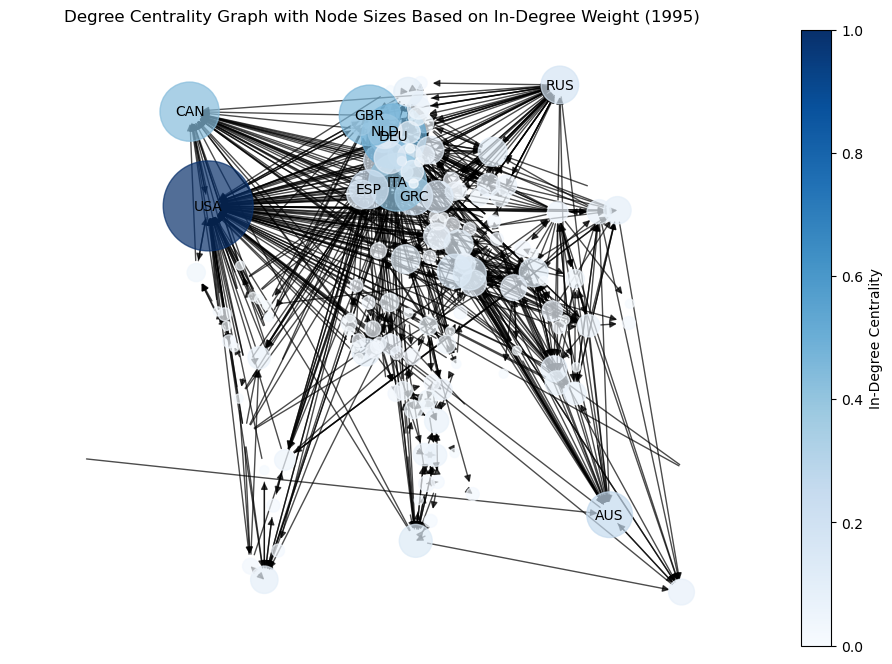

In [99]:
# Choose the index of 'migration_1995_total' in the migration_years list
year_index = migration_years.index('migration_1995_total')

# Measure in-degree centrality for the graph at index 'year_index'
in_degree_centrality_1995 = nx.in_degree_centrality(graphs[year_index])

# Get node positions from nodes_df
node_positions = {row['Label']: (row['lng'], row['lat']) for index, row in nodes_df.iterrows() if row['Label'] in in_degree_centrality_1995}

# Create lists for node sizes and colors based on in-degree weight
node_sizes = [in_degree_centrality_1995[node] * 8000 for node in graphs[year_index].nodes()]
node_colors = [in_degree_centrality_1995[node] for node in graphs[year_index].nodes()]

# Visualize the graph with adjusted node sizes and colors
plt.figure(figsize=(12, 8))

# Draw nodes with sizes and colors
nx.draw_networkx_nodes(graphs[year_index], pos=node_positions, node_size=node_sizes, node_color=node_colors, cmap='Blues', alpha=0.7)

# Draw edges
nx.draw_networkx_edges(graphs[year_index], pos=node_positions, edge_color='black', alpha=0.7)

# Draw labels for top 10 nodes
nx.draw_networkx_labels(top_10_graph, pos=node_positions, labels={node: nodes_df.loc[nodes_df['Label'] == node, 'Abb'].values[0] for node in top_10_nodes}, font_size=10)

plt.title('Degree Centrality Graph with Node Sizes Based on In-Degree Weight (1995)')
plt.colorbar(plt.cm.ScalarMappable(cmap='Blues'), label='In-Degree Centrality')
plt.axis('off')
plt.show()


### Graph for In-degree centrality of 1995  filtered

C:\Users\I A Computers\AppData\Local\Temp\ipykernel_7128\4286103092.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='Blues'), label='Degree Centrality')


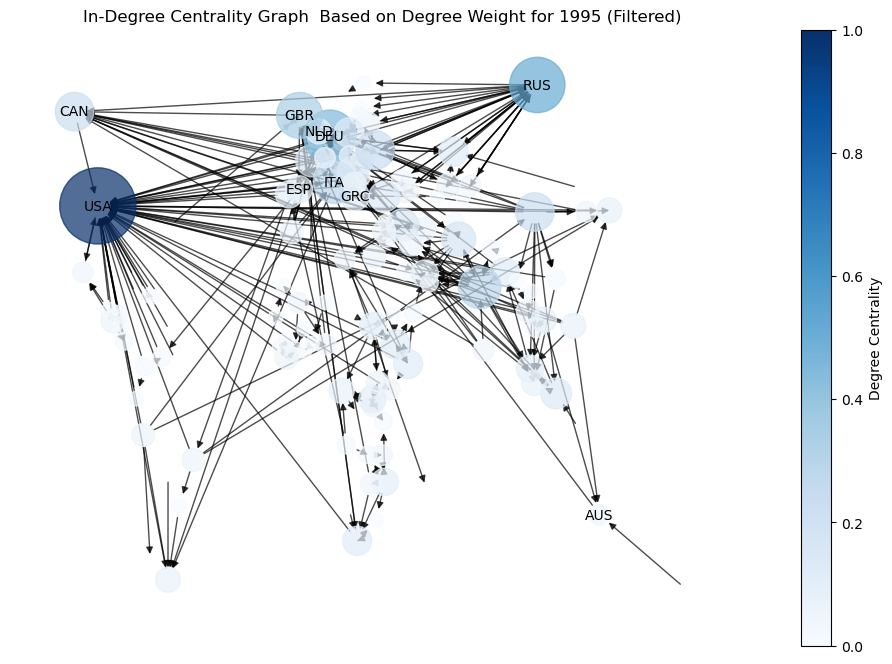

In [130]:
import numpy as np

# Choose the index of 'migration_1995_total' in the migration_years list
year_index = migration_years.index('migration_1995_total')

# Measure degree centrality for the graph at index 'year_index'
degree_centrality_1995 = nx.degree_centrality(graphs[year_index])

# Get node positions from nodes_df
node_positions = {row['Label']: (row['lng'], row['lat']) for index, row in nodes_df.iterrows() if row['Label'] in degree_centrality_1995}

# Calculate the threshold for bottom 15% nodes based on degree centrality values
threshold = np.percentile(list(degree_centrality_1995.values()), 20)

# Filter nodes with degree centrality below the threshold
filtered_nodes = {node: centrality for node, centrality in degree_centrality_1995.items() if centrality >= threshold}

# Create lists for node sizes and colors based on degree centrality for filtered nodes
node_sizes = [filtered_nodes[node] * 8000 for node in filtered_nodes]
node_colors = [filtered_nodes[node] for node in filtered_nodes]

# Visualize the graph with adjusted node sizes and colors for filtered nodes
plt.figure(figsize=(12, 8))

# Draw nodes with sizes and colors for filtered nodes
nx.draw_networkx_nodes(graphs[year_index], pos=node_positions, nodelist=filtered_nodes.keys(), node_size=node_sizes, node_color=node_colors, cmap='Blues', alpha=0.7)

# Draw edges
nx.draw_networkx_edges(graphs[year_index], pos=node_positions, edge_color='black', alpha=0.7)

# Draw labels for top 10 nodes
nx.draw_networkx_labels(top_10_graph, pos=node_positions, labels={node: nodes_df.loc[nodes_df['Label'] == node, 'Abb'].values[0] for node in top_10_nodes}, font_size=10)

plt.title('In-Degree Centrality Graph  Based on Degree Weight for 1995 (Filtered)')
plt.colorbar(plt.cm.ScalarMappable(cmap='Blues'), label='Degree Centrality')
plt.axis('off')
plt.show()


### Degree Distribution for all years

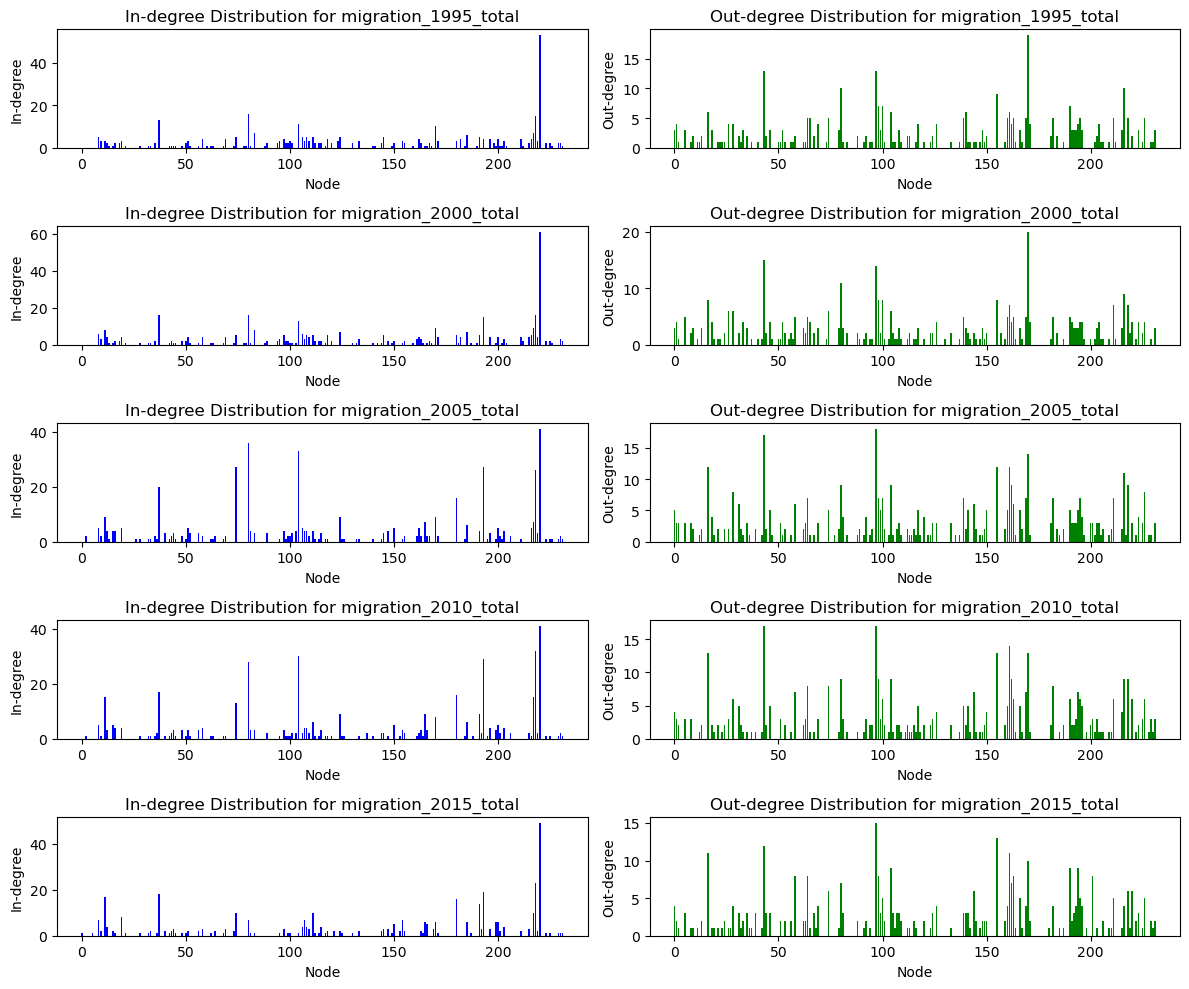

In [131]:
import matplotlib.pyplot as plt

# List of years
years = ['migration_1995_total', 'migration_2000_total', 'migration_2005_total', 'migration_2010_total', 'migration_2015_total']

plt.figure(figsize=(12, 10))

for idx, year in enumerate(years, 1):
    # Choose the index of the year in the migration_years list
    year_index = migration_years.index(year)

    # Get the graph for the specific year
    graph_year = graphs[year_index]

    # Calculate in-degree and out-degree distributions for the year's graph
    in_degree_dist = dict(graph_year.in_degree())
    out_degree_dist = dict(graph_year.out_degree())

    # Create linear plots for in-degree and out-degree distributions
    plt.subplot(5, 2, idx * 2 - 1)
    plt.bar(in_degree_dist.keys(), in_degree_dist.values(), color='blue')
    plt.title(f'In-degree Distribution for {year}')
    plt.xlabel('Node')
    plt.ylabel('In-degree')

    plt.subplot(5, 2, idx * 2)
    plt.bar(out_degree_dist.keys(), out_degree_dist.values(), color='green')
    plt.title(f'Out-degree Distribution for {year}')
    plt.xlabel('Node')
    plt.ylabel('Out-degree')

plt.tight_layout()
plt.show()
